### 1. importing the data

In [57]:
import pandas as pd

marketing = pd.read_csv("marketing_new.csv", parse_dates = ['date_served', 'date_subscribed', 'date_canceled'])
print(marketing.head())

   Unnamed: 0     user_id date_served marketing_channel          variant  \
0           0  a100000029  2018-01-01         House Ads  personalization   
1           1  a100000030  2018-01-01         House Ads  personalization   
2           2  a100000031  2018-01-01         House Ads  personalization   
3           3  a100000032  2018-01-01         House Ads  personalization   
4           4  a100000033  2018-01-01         House Ads  personalization   

   converted language_displayed language_preferred    age_group  \
0       True            English            English   0-18 years   
1       True            English            English  19-24 years   
2       True            English            English  24-30 years   
3       True            English            English  30-36 years   
4       True            English            English  36-45 years   

  date_subscribed date_canceled subscribing_channel  is_retained  DoW  \
0      2018-01-01           NaT           House Ads         True  0

### 2. examining the data 
* to ensure the validity of the dataset
* to have a more holistic understanding what the dataset contains

In [58]:
#print the summary statistics
print(marketing.describe())

                count         mean         std  min     25%     50%     75%  \
Unnamed: 0    10037.0  5018.000000  2897.57666  0.0  2509.0  5018.0  7527.0   
DoW            1856.0     2.529634     1.93790  0.0     1.0     2.0     4.0   
channel_code   1856.0     2.631466     1.21134  1.0     2.0     2.0     3.0   

                  max  
Unnamed: 0    10036.0  
DoW               6.0  
channel_code      5.0  


In [59]:
#print the number of non-missing values and the data types of all columns
print(marketing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 16 columns):
Unnamed: 0             10037 non-null int64
user_id                10037 non-null object
date_served            10021 non-null datetime64[ns]
marketing_channel      10022 non-null object
variant                10037 non-null object
converted              10037 non-null bool
language_displayed     10037 non-null object
language_preferred     10037 non-null object
age_group              10037 non-null object
date_subscribed        1856 non-null datetime64[ns]
date_canceled          577 non-null datetime64[ns]
subscribing_channel    1856 non-null object
is_retained            10037 non-null bool
DoW                    1856 non-null float64
channel_code           1856 non-null float64
is_correct_lang        10037 non-null object
dtypes: bool(2), datetime64[ns](3), float64(2), int64(1), object(8)
memory usage: 1.1+ MB
None


In [60]:
#check dtype of is_retained, converted column
print(marketing['is_retained'].dtype)
print(marketing['is_retained'].unique())

print(marketing['converted'].dtype)
print(marketing['converted'].unique())

bool
[ True False]
bool
[ True False]


In [61]:
#change dtype appropriately
marketing['is_retained'] = marketing['is_retained'].astype('bool')
marketing['converted'] = marketing['converted'].astype('bool')
print(marketing['is_retained'].dtype)
print(marketing['converted'].dtype)

bool
bool


### Feature engineering
> Adding new columns that derive information from existing data or based on domain knowledge
* Even in relatively simple datasets, there are always new characteristics you could pull out to create a more in-depth analysis.

In [62]:
#add 'channel_code' column
print(marketing['marketing_channel'].dtype)
print(marketing['marketing_channel'].unique())

object
['House Ads' 'Push' 'Facebook' 'Instagram' 'Email' nan]


0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: channel_code, dtype: float64
[ 1.  5.  3.  2.  4. nan]


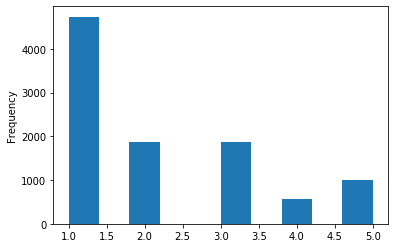

In [82]:
channel_dict = {'House Ads':1, 'Instagram':2, 'Facebook':3, 'Email':4, 'Push':5}
marketing['channel_code'] = marketing['marketing_channel'].map(channel_dict)
print(marketing['channel_code'].head())
print(marketing['channel_code'].unique())
marketing['channel_code'].plot(kind='hist')

In [64]:
#add 'is_correct_lang' column to check if language_displayed and language_preferred are well matched
import numpy as np
marketing['is_correct_lang'] = np.where(marketing['language_displayed']==marketing['language_preferred'], 'Yes', 'No')
print(marketing['is_correct_lang'].head())
print(marketing['is_correct_lang'].unique())
print(marketing['is_correct_lang'].dtype)

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: is_correct_lang, dtype: object
['Yes' 'No']
object


In [65]:
#add DoW column to know the day of week on which a user subscribed
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek
print(marketing['DoW'].head())
print(marketing['DoW'].unique())

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: DoW, dtype: float64
[ 0.  1.  2.  3.  4.  5.  6. nan]


### check daily marketing reach by channel

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

#daily marketing reach by channel
daily_users = marketing.groupby('date_served')['user_id'].nunique()
print(daily_users)

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
2018-01-06    308
2018-01-07    275
2018-01-08    312
2018-01-09    312
2018-01-10    337
2018-01-11    310
2018-01-12    301
2018-01-13    306
2018-01-14    305
2018-01-15    767
2018-01-16    388
2018-01-17    369
2018-01-18    318
2018-01-19    305
2018-01-20    311
2018-01-21    229
2018-01-22    178
2018-01-23    172
2018-01-24    190
2018-01-25    184
2018-01-26    222
2018-01-27    320
2018-01-28    320
2018-01-29    319
2018-01-30    317
2018-01-31    340
Name: user_id, dtype: int64


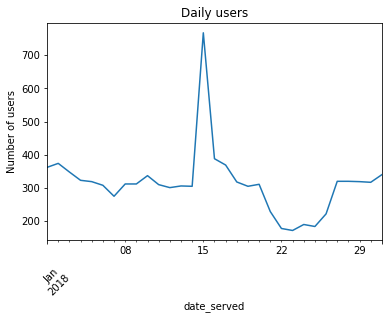

In [67]:
#visualize
daily_users.plot()

plt.title('Daily users')
plt.ylabel('Number of users')
plt.xticks(rotation=45)

plt.show()

### analyzing common metrics - conversion rate & retention rate

In [68]:
#conversion rate
total = marketing['user_id'].nunique()
subscribers = marketing[marketing['converted']==True]['user_id'].nunique()
conversion_rate = subscribers / total
print("conversion_rate: ", round(conversion_rate*100, 2), "%")

conversion_rate:  14.09 %


In [72]:
#retention rate
retained = marketing[(marketing['is_retained']==True) & (marketing['converted']==True)]['user_id'].nunique()
retention_rate = retained / subscribers
print("retention_rate: ", round(retention_rate*100, 2), "%")

retention_rate:  67.57 %


### <mark>! check this part later !</mark>

In [73]:
#if 'converted' is False, 'is_retained' should be False as well
m = marketing[(marketing['is_retained']==True) & (marketing['converted']!=True)]
print(m[['user_id','converted','is_retained']].head())

#check later
#marketing['is_retained'] = np.where(marketing['converted']==False, False)

       user_id  converted  is_retained
22  a100000050      False         True
24  a100000051      False         True
26  a100000052      False         True
28  a100000053      False         True
30  a100000054      False         True


### customer segmentation
* could be age, gender, location, past interactions with business, marketing channels, etc.
* we'll explore segmentation by <u>marketing channel</u>

In [74]:
#1
def conv_rate(column_name, language):
    temp_df = marketing[marketing[column_name]==language]
    total = temp_df['user_id'].nunique()
    converted = temp_df[temp_df['converted']==True]['user_id'].nunique()
    conversion_rate = converted/total
    print(language,'conversion rate:', round(conversion_rate*100, 2), '%')
    
print(marketing['language_displayed'].unique())
conv_rate('language_displayed', 'English')
conv_rate('language_displayed', 'German')
conv_rate('language_displayed', 'Arabic')
conv_rate('language_displayed', 'Spanish')

['English' 'German' 'Arabic' 'Spanish']
English conversion rate: 13.13 %
German conversion rate: 71.62 %
Arabic conversion rate: 50.0 %
Spanish conversion rate: 20.0 %


In [78]:
#2
total = marketing.groupby(['language_displayed'])['user_id'].nunique()
subscribers = marketing[marketing['converted']==True].groupby(['language_displayed'])['user_id'].nunique()
language_conversion_rate = subscribers / total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.131260
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


### aggregate by date

In [88]:
total = marketing.groupby(['date_served'])['user_id'].nunique()
subscribers = marketing[marketing['converted']==True].groupby(['date_served'])['user_id'].nunique()
daily_conversion_rates = subscribers / total
print(daily_conversion_rates)

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64


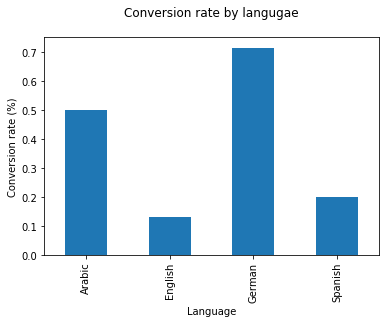

In [85]:
#visualize
language_conversion_rate.plot(kind='bar')
plt.title('Conversion rate by langugae\n')
plt.xlabel('Language')
plt.ylabel('Conversion rate (%)')
plt.show()

In [90]:
#visualize daily conversion rate
daily_conversion_rate = pd.DataFrame(daily_conversion_rates.reset_index())
daily_conversion_rate.columns = ['date_served', 'conversion_rate']
print(daily_conversion_rate)

   date_served  conversion_rate
0   2018-01-01         0.099448
1   2018-01-02         0.098930
2   2018-01-03         0.103448
3   2018-01-04         0.108359
4   2018-01-05         0.125392
5   2018-01-06         0.113636
6   2018-01-07         0.141818
7   2018-01-08         0.115385
8   2018-01-09         0.125000
9   2018-01-10         0.118694
10  2018-01-11         0.080645
11  2018-01-12         0.076412
12  2018-01-13         0.084967
13  2018-01-14         0.085246
14  2018-01-15         0.113429
15  2018-01-16         0.255155
16  2018-01-17         0.219512
17  2018-01-18         0.091195
18  2018-01-19         0.059016
19  2018-01-20         0.067524
20  2018-01-21         0.087336
21  2018-01-22         0.123596
22  2018-01-23         0.122093
23  2018-01-24         0.115789
24  2018-01-25         0.125000
25  2018-01-26         0.090090
26  2018-01-27         0.065625
27  2018-01-28         0.062500
28  2018-01-29         0.059561
29  2018-01-30         0.066246
30  2018

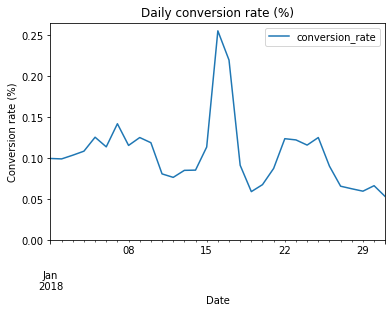

In [93]:
daily_conversion_rate.plot('date_served', 'conversion_rate')
plt.title('Daily conversion rate (%)')
plt.xlabel('Date')
plt.ylabel('Conversion rate (%)')
plt.ylim(0) #set the y-axis to begin at 0
plt.show()

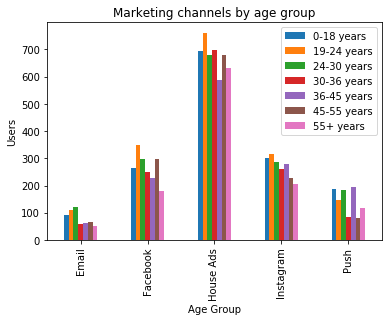

In [94]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])['user_id'].count()
channel_age_df = pd.DataFrame(channel_age.unstack(level=1))

channel_age_df.plot(kind='bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
plt.legend(loc='upper right', labels = channel_age_df.columns.values)
plt.show()

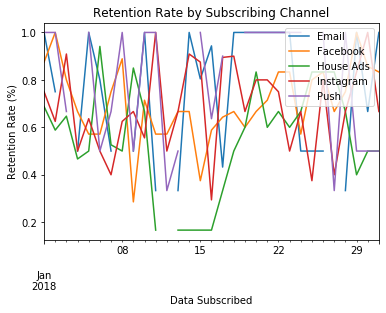

In [97]:
#retention rate by channels
retention_total = marketing.groupby(['date_subscribed', 'subscribing_channel'])['user_id'].nunique()
retention_subs = marketing[marketing['is_retained']==True].groupby(['date_subscribed', 'subscribing_channel'])['user_id'].nunique()

retention_rate = retention_subs / retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

retention_rate_df.plot()
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Data Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc = 'upper right', labels = retention_rate_df.columns.values)
plt.show()

### building functions (automate repetitive work)

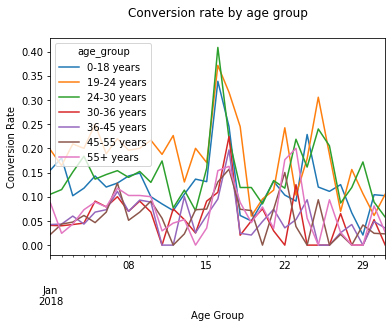

In [99]:
#calculate conversion rate
def conversion_rate(dataframe, column_names):
    column_conv = dataframe[dataframe['converted']==True].groupby(column_names)['user_id'].nunique()
    column_total = dataframe.groupby(column_names)['user_id'].nunique()
    conversion_rate = column_conv / column_total
    conversion_rate = conversion_rate.fillna(0) #fill missing values with 0
    return conversion_rate

age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

age_group_df.plot()
plt.title('Conversion rate by age group\n')
plt.xlabel('Age Group')
plt.ylabel('Conversion Rate')
plt.show()

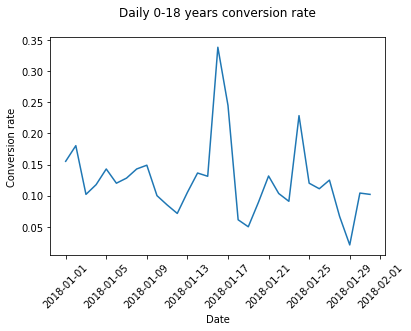

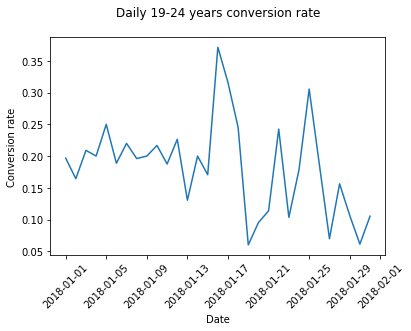

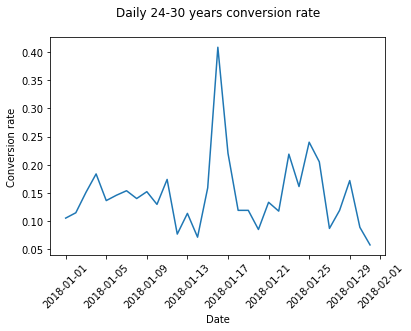

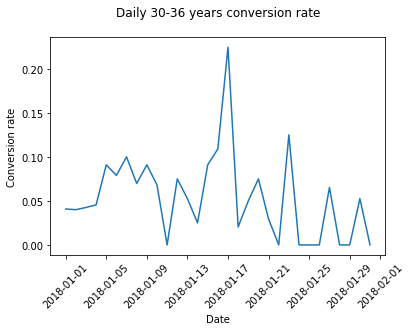

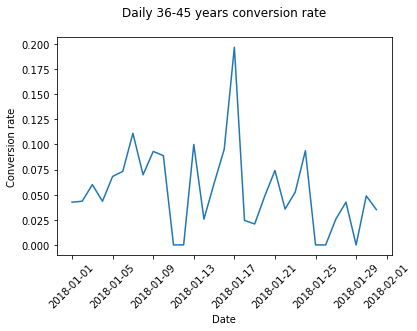

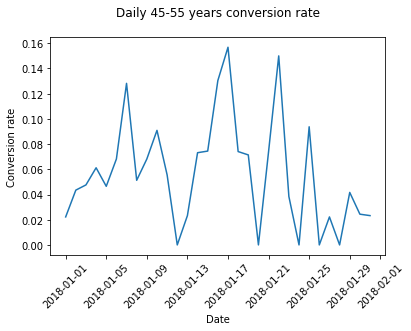

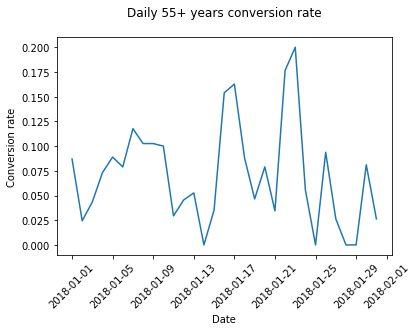

<Figure size 432x288 with 0 Axes>

In [106]:
def plotting_conv(dataframe):
    for column in dataframe:
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily '+str(column)+' conversion rate\n')
        plt.ylabel('Conversion rate')
        plt.xlabel('Date')
        plt.xticks(rotation=45)
        plt.show()
        plt.clf()
        
        
plotting_conv(age_group_df)

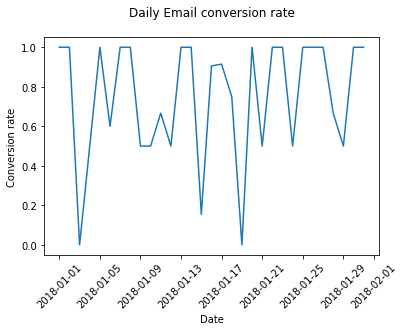

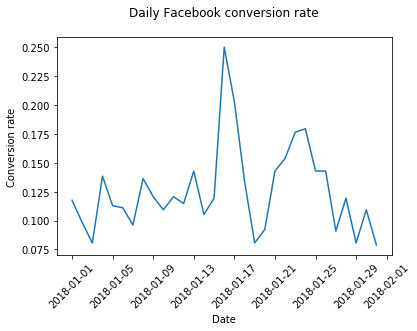

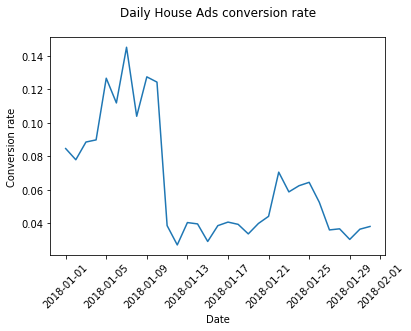

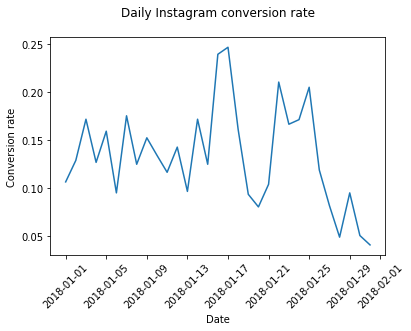

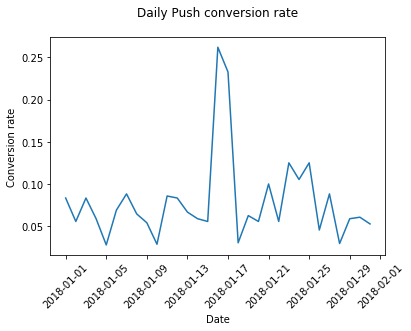

<Figure size 432x288 with 0 Axes>

In [113]:
daily_conv_channel = conversion_rate(marketing, ['date_served', 'marketing_channel'])
daily_conv_channel_df = pd.DataFrame(daily_conv_channel.unstack(level=1))
plotting_conv(daily_conv_channel_df)

### -> house ads conversion rate has dropped significantly around 2018-1-11

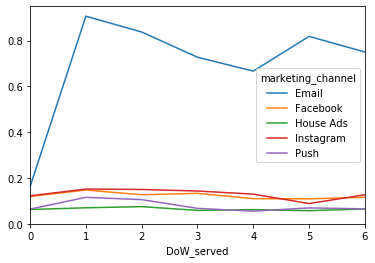

In [115]:
#analyze house ads conversion rate
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek
DoW_conversion = conversion_rate(marketing, ['DoW_served', 'marketing_channel'])
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

DoW_df.plot()
plt.ylim(0)
plt.show()

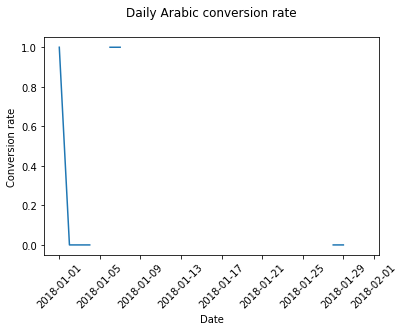

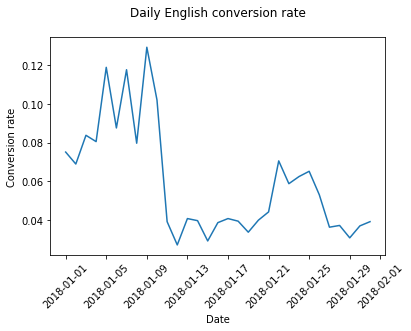

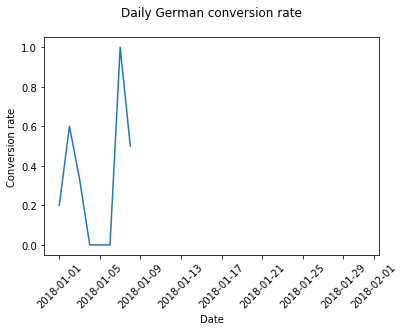

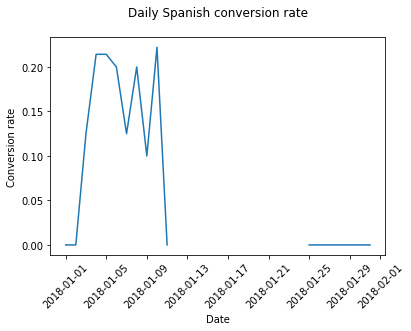

<Figure size 432x288 with 0 Axes>

In [118]:
#conversion rate by language(perhaps the new marketing campaign does not apply broadly across diff cultures)
house_ads = marketing[marketing['marketing_channel']=='House Ads']
conv_lang_channel = conversion_rate(house_ads, ['date_served', 'language_displayed'])
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))
plotting_conv(conv_lang_df)

In [121]:
house_ads['is_correct_lang'] = np.where(house_ads['language_displayed']==house_ads['language_preferred'], 'Yes', 'No')
language_check = house_ads.groupby(['date_served', 'is_correct_lang'])['user_id'].count()
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)
print(language_check_df)

is_correct_lang    No    Yes
date_served                 
2018-01-01        2.0  189.0
2018-01-02        3.0  247.0
2018-01-03        0.0  220.0
2018-01-04        0.0  168.0
2018-01-05        0.0  160.0
2018-01-06        1.0  151.0
2018-01-07        2.0  130.0
2018-01-08        0.0  154.0
2018-01-09        0.0  157.0
2018-01-10        0.0  170.0
2018-01-11       20.0  135.0
2018-01-12       18.0  130.0
2018-01-13       26.0  122.0
2018-01-14       20.0  131.0
2018-01-15       16.0  192.0
2018-01-16       28.0  127.0
2018-01-17       21.0  127.0
2018-01-18       31.0  121.0
2018-01-19       22.0  127.0
2018-01-20       28.0  124.0
2018-01-21       14.0  100.0
2018-01-22       13.0   72.0
2018-01-23       16.0   69.0
2018-01-24       13.0   83.0
2018-01-25       19.0   74.0
2018-01-26       24.0   92.0
2018-01-27       18.0  149.0
2018-01-28       28.0  136.0
2018-01-29       24.0  142.0
2018-01-30       23.0  145.0
2018-01-31       23.0  135.0


/Users/boyoonchoi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


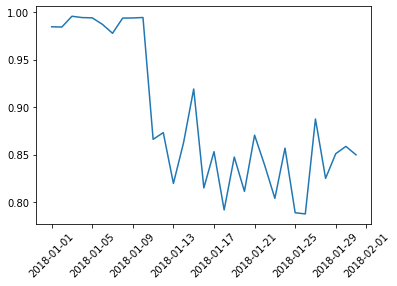

In [123]:
#check the percentage of case where language was served right
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.xticks(rotation=45)
plt.show()

* we can guess the conversion rate dropped because the language was not properly displayed.<br/>
* let's roughly calculate impact of this bug (how many potential subscribers were lost?)

In [153]:
#let's compare language proportions
before_bug = house_ads[house_ads['date_served']<'2018-01-11']
after_bug = house_ads[house_ads['date_served']>='2018-01-11']

before_bug2 = pd.DataFrame(before_bug.groupby(['language_displayed'])['user_id'].count())
before_bug2.columns = ['count']
before_bug2['pct'] = round(before_bug2['count']/before_bug2['count'].sum(axis=0)*100, 2)

print("before bug : \n", before_bug2, '\n\n')

after_bug2 = pd.DataFrame(after_bug.groupby(['language_displayed'])['user_id'].count())
after_bug2.columns = ['count']
after_bug2['pct'] = round(after_bug2['count']/after_bug2['count'].sum(axis=0)*100, 2)

print("after bug : \n", after_bug2)

before bug : 
                     count    pct
language_displayed              
Arabic                 14   0.80
English              1600  91.22
German                 30   1.71
Spanish               110   6.27 


after bug : 
                     count    pct
language_displayed              
Arabic                  3   0.10
English              2962  99.46
German                  1   0.03
Spanish                12   0.40


* house ads were almost all served in English rather than users' preferred languages

In [157]:
#1. compare conversion rates of each language compared to English before the bug arose
conv_before_bug = conversion_rate(before_bug, 'language_displayed')
print(conv_before_bug, '\n')

spanish_index = conv_before_bug['Spanish']/conv_before_bug['English']
arabic_index = conv_before_bug['Arabic']/conv_before_bug['English']
german_index = conv_before_bug['German']/conv_before_bug['English']

print('Spanish index : ', spanish_index)
print('Arabic index : ', arabic_index)
print('German index : ', german_index)


language_displayed
Arabic     0.500000
English    0.099093
German     0.444444
Spanish    0.166667
Name: user_id, dtype: float64 

Spanish index :  1.681924882629108
Arabic index :  5.045774647887324
German index :  4.485133020344287


In [171]:
#check sum of each preferred language by each day
converted = house_ads.groupby(['date_served', 'language_preferred']).agg({'user_id':'nunique', 'converted':'sum'})
converted_df = pd.DataFrame(converted.unstack(level=1))
converted_df = converted_df.loc['2018-01-11':'2018-01-31'] #set date range
print(converted_df.head())

                   user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-11             7.0   133.0    2.0    13.0       0.0     6.0    0.0   
2018-01-12             3.0   129.0    4.0    11.0       0.0     3.0    0.0   
2018-01-13             6.0   121.0    5.0    16.0       0.0     5.0    1.0   
2018-01-14             5.0   131.0    3.0    12.0       0.0     6.0    0.0   
2018-01-15             2.0   189.0    4.0    10.0       0.0     6.0    0.0   

                            
language_preferred Spanish  
date_served                 
2018-01-11             0.0  
2018-01-12             1.0  
2018-01-13             0.0  
2018-01-14             0.0  
2018-01-15             0.0  


In [172]:
#create expected conversion rate, and expected conversoins columns for each language

converted_df['english_conv_rate'] = converted_df[('converted', 'English')]

converted_df['expected_spanish_rate'] = converted_df['english_conv_rate']*spanish_index
converted_df['expected_arabic_rate'] = converted_df['english_conv_rate']*arabic_index
converted_df['expected_german_rate'] = converted_df['english_conv_rate']*german_index

converted_df['expected_spanish_conv'] = converted_df['expected_spanish_rate']/100*converted_df[('user_id', 'Spanish')]
converted_df['expected_arabic_conv'] = converted_df['expected_arabic_rate']/100*converted_df[('user_id', 'Arabic')]
converted_df['expected_german_conv'] = converted_df['expected_german_rate']/100*converted_df[('user_id', 'German')]

print(converted_df.tail())

                   user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-27             3.0   148.0    3.0    12.0       1.0     4.0    0.0   
2018-01-28             5.0   134.0    3.0    21.0       0.0     4.0    0.0   
2018-01-29             7.0   138.0    4.0    15.0       2.0     3.0    0.0   
2018-01-30             4.0   139.0    3.0    18.0       0.0     4.0    0.0   
2018-01-31             7.0   130.0    4.0    16.0       1.0     4.0    0.0   

                           english_conv_rate expected_spanish_rate  \
language_preferred Spanish                                           
date_served                                                          
2018-01-27             1.0               4.0              6.727700   
2018-01-28             2.0               4.0              6.727700   
2018-01-29             0.

In [176]:
#calculate (potentially) lost subscribers
expected_subs = converted_df['expected_spanish_conv'].sum() + converted_df['expected_arabic_conv'].sum() + converted_df['expected_german_conv'].sum()
actual_subs = converted_df[('converted','Spanish')].sum() + converted_df[('converted','Arabic')].sum() + converted_df[('converted','German')].sum()
print('expected : ', expected_subs)
print('actual : ', actual_subs)
print('difference : ', expected_subs - actual_subs)

expected :  58.14414319248826
actual :  26.0
difference :  32.14414319248826


-> we can assume that we lost 32 subscribers due to language error

### A/B Testing

In [179]:
#check if testing group and controlled group are equally distributed
email = marketing[marketing['marketing_channel']=='Email']
allocation = email.groupby(['variant'])['user_id'].nunique()
print(allocation)

variant
control            270
personalization    284
Name: user_id, dtype: int64


In [184]:
#check conversion rate for each group
subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1))
print(subscribers_df.head())

control = subscribers_df['control'].dropna()
personalization = subscribers_df['personalization'].dropna()

print("Control conversion rate: ", round(np.mean(control), 2))
print("Personalization conversion rate: ", round(np.mean(personalization), 2))

variant    control personalization
user_id                           
a100000526     NaN            True
a100000530     NaN            True
a100000534     NaN           False
a100000538     NaN            True
a100000542     NaN            True
Control conversion rate:  0.28
Personalization conversion rate:  0.39


In [185]:
#calculate lift (check how much more effective personalized email)
def lift(control, treatment):
    control_mean = np.mean(control)
    treatment_mean = np.mean(treatment)
    lift = (treatment_mean - control_mean) / control_mean
    return str(round(lift*100, 2)) + '%'

print(lift(control, personalization))

38.85%


In [186]:
#significance test using t-distribution (see if the difference is due to coincidence)
from scipy.stats import ttest_ind
t = ttest_ind(control, personalization)
print(t)

Ttest_indResult(statistic=-2.7343299447505074, pvalue=0.006451487844694175)


* t-statistic of 1.96 is typically statistically significant at the 95% level
* p-value less than 0.05 is typically considered statistically significant at 95% significance level<br/>
-> the results are highly statically significant with p = 0.006